In [3]:
from web3 import Web3
from concurrent.futures import ThreadPoolExecutor
import json

In [9]:
class Web3Util:
    def __init__(self, provider):
        self.web3_instance = Web3(provider)

    def get_block(self, block_number):
        try:
            block = self.web3_instance.eth.get_block(block_number, True)
            return block
        except Exception as e:
            raise Exception("Could not get information of getBlock") from e
    def get_trx(self, trx_hash):
        try:
            trx = self.web3_instance.eth.get_transaction(trx_hash)
            return trx
        except Exception as e:
            raise Exception("Could not get information of getTransaction") from e
web3Util = Web3Util(Web3.HTTPProvider('https://eth.llamarpc.com'))

In [5]:
#load db.json
with open('db.json') as f:
    db = json.load(f)
last_block = db.get('last_block', 0)
block_step = db.get('block_step', 20)

In [6]:
with ThreadPoolExecutor() as executor:
    blocks = list(executor.map(web3Util.get_block, range(last_block, last_block+ block_step)))
db['last_block'] = last_block + block_step
#save db.json

In [7]:
trx =[]
for block in blocks:
    for transaction in block.transactions:
        trx.append(dict(transaction))
for transaction in trx:
    if "accessList" in transaction:
        del transaction["accessList"]
    transaction['blockHash'] = transaction['blockHash'].hex()
    transaction['hash'] = transaction['hash'].hex()
    transaction['input'] = transaction['input'].hex()
    transaction['r'] = transaction['r'].hex()
    transaction['s'] = transaction['s'].hex()

In [25]:
withdrawals = []
for block in blocks:
    for withdrawal in block.withdrawals:
        wd = dict(withdrawal)
        wd['blockNumber'] = block.number
        withdrawals.append(wd)
withdrawals

[{'address': '0xB9D7934878B5FB9610B3fE8A5e441e8fad7E293f',
  'amount': 17307570,
  'index': 30242550,
  'validatorIndex': 535044,
  'blockNumber': 18925120},
 {'address': '0xB9D7934878B5FB9610B3fE8A5e441e8fad7E293f',
  'amount': 17475823,
  'index': 30242551,
  'validatorIndex': 535045,
  'blockNumber': 18925120},
 {'address': '0xB9D7934878B5FB9610B3fE8A5e441e8fad7E293f',
  'amount': 17466317,
  'index': 30242552,
  'validatorIndex': 535046,
  'blockNumber': 18925120},
 {'address': '0xB9D7934878B5FB9610B3fE8A5e441e8fad7E293f',
  'amount': 17478317,
  'index': 30242553,
  'validatorIndex': 535047,
  'blockNumber': 18925120},
 {'address': '0xB9D7934878B5FB9610B3fE8A5e441e8fad7E293f',
  'amount': 17207920,
  'index': 30242554,
  'validatorIndex': 535048,
  'blockNumber': 18925120},
 {'address': '0xB9D7934878B5FB9610B3fE8A5e441e8fad7E293f',
  'amount': 17436283,
  'index': 30242555,
  'validatorIndex': 535049,
  'blockNumber': 18925120},
 {'address': '0xB9D7934878B5FB9610B3fE8A5e441e8fad7E

In [26]:
block = blocks[0].__dict__
block


{'baseFeePerGas': 12375702565,
 'difficulty': 0,
 'extraData': HexBytes('0x47616d626974204c616273202868747470733a2f2f676d6269742e636f29'),
 'gasLimit': 30000000,
 'gasUsed': 18327108,
 'hash': HexBytes('0xfa027eac0597780262cf977732ba0a7c17b7fda8091c42d8121a7688a0026a08'),
 'logsBloom': HexBytes('0x92ab0cf17924f1aa5e3d576bc93dab382f0e6ae3f892abfed0ab840ffef69cbf92e3c77d79f6bb77b6a9bb60c49e559096d143efff85aefe9f74979346ebab5c4c7a965c07d4abbdfdb2c32f7d71bc7937df8aafbce55f6de3b62fbc8e6571af5edd44ddc7bff9d81ef259cdbb228d55ea3a1ff299dbde535b959c9b8d9f5fec0ecfe35479fe689b09537fdc85f76bf614419ae5fbf56f1ec8a31cd2e75d4c29fee1bfb3e1b37b6eaccbcde41e5dfefd574a6e449d6fbf2ffde2d2fbe7ce3b46c34836a6b7329d6c2e123f7bad7ef6de32f9071f7d7d8d7f7f14dbdfe9f7e7ab7c7dfadef6cadbe2efdd5af73e95c46c86fbff4c6b5eb4dae407df16bcd5dd5b'),
 'miner': '0x0Aa8EBb6aD5A8e499E550ae2C461197624c6e667',
 'mixHash': HexBytes('0x16306e61af59c52f14736982eb2be2fcd2a14db6294550ff6c0b2d3db6a2e450'),
 'nonce': HexBytes('0x000000000000000

In [30]:
#list exclude field
exclude_fields = ['transactions', 'withdrawals', 'uncles']


In [42]:
#convert all HexBytes to string
dict_blocks = []
for block in blocks:
    dict_block = dict(block)
    for key, value in block.__dict__.items():
        if (key in exclude_fields):
            dict_block.pop(key, None)
            continue
        if isinstance(value, bytes):
            dict_block[key] = value.hex()
    dict_blocks.append(dict_block)

[{'baseFeePerGas': 12375702565,
  'difficulty': 0,
  'extraData': '0x47616d626974204c616273202868747470733a2f2f676d6269742e636f29',
  'gasLimit': 30000000,
  'gasUsed': 18327108,
  'hash': '0xfa027eac0597780262cf977732ba0a7c17b7fda8091c42d8121a7688a0026a08',
  'logsBloom': '0x92ab0cf17924f1aa5e3d576bc93dab382f0e6ae3f892abfed0ab840ffef69cbf92e3c77d79f6bb77b6a9bb60c49e559096d143efff85aefe9f74979346ebab5c4c7a965c07d4abbdfdb2c32f7d71bc7937df8aafbce55f6de3b62fbc8e6571af5edd44ddc7bff9d81ef259cdbb228d55ea3a1ff299dbde535b959c9b8d9f5fec0ecfe35479fe689b09537fdc85f76bf614419ae5fbf56f1ec8a31cd2e75d4c29fee1bfb3e1b37b6eaccbcde41e5dfefd574a6e449d6fbf2ffde2d2fbe7ce3b46c34836a6b7329d6c2e123f7bad7ef6de32f9071f7d7d8d7f7f14dbdfe9f7e7ab7c7dfadef6cadbe2efdd5af73e95c46c86fbff4c6b5eb4dae407df16bcd5dd5b',
  'miner': '0x0Aa8EBb6aD5A8e499E550ae2C461197624c6e667',
  'mixHash': '0x16306e61af59c52f14736982eb2be2fcd2a14db6294550ff6c0b2d3db6a2e450',
  'nonce': '0x0000000000000000',
  'number': 18925120,
  'parentHash

In [43]:
dict_blocks[0].keys()

{'baseFeePerGas': 12375702565,
 'difficulty': 0,
 'extraData': '0x47616d626974204c616273202868747470733a2f2f676d6269742e636f29',
 'gasLimit': 30000000,
 'gasUsed': 18327108,
 'hash': '0xfa027eac0597780262cf977732ba0a7c17b7fda8091c42d8121a7688a0026a08',
 'logsBloom': '0x92ab0cf17924f1aa5e3d576bc93dab382f0e6ae3f892abfed0ab840ffef69cbf92e3c77d79f6bb77b6a9bb60c49e559096d143efff85aefe9f74979346ebab5c4c7a965c07d4abbdfdb2c32f7d71bc7937df8aafbce55f6de3b62fbc8e6571af5edd44ddc7bff9d81ef259cdbb228d55ea3a1ff299dbde535b959c9b8d9f5fec0ecfe35479fe689b09537fdc85f76bf614419ae5fbf56f1ec8a31cd2e75d4c29fee1bfb3e1b37b6eaccbcde41e5dfefd574a6e449d6fbf2ffde2d2fbe7ce3b46c34836a6b7329d6c2e123f7bad7ef6de32f9071f7d7d8d7f7f14dbdfe9f7e7ab7c7dfadef6cadbe2efdd5af73e95c46c86fbff4c6b5eb4dae407df16bcd5dd5b',
 'miner': '0x0Aa8EBb6aD5A8e499E550ae2C461197624c6e667',
 'mixHash': '0x16306e61af59c52f14736982eb2be2fcd2a14db6294550ff6c0b2d3db6a2e450',
 'nonce': '0x0000000000000000',
 'number': 18925120,
 'parentHash': '0x349b58

In [12]:
trx = web3Util.get_trx('0xca1b823c955d32f878a6e7cbe576aa9efa847b28f7bcf1a275ef6cf74ead0b14')
trx.keys()

KeysView(AttributeDict({'accessList': [AttributeDict({'address': '0x7F9F70Da4af54671a6abAc58e705b5634cac8819', 'storageKeys': []}), AttributeDict({'address': '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2', 'storageKeys': [HexBytes('0x1a824a6850dcbd9223afea4418727593881e2911ed2e734272a263153159fe26'), HexBytes('0xb8e9439cc0c7eb14090871a1de1d18db1d20e23fd45bf0fb0db41abef4617458')]}), AttributeDict({'address': '0xCEde28c51b86988A2e91A4C27e80733e0ADBfE7D', 'storageKeys': [HexBytes('0x0000000000000000000000000000000000000000000000000000000000000007'), HexBytes('0x000000000000000000000000000000000000000000000000000000000000000c'), HexBytes('0x0000000000000000000000000000000000000000000000000000000000000008'), HexBytes('0x0000000000000000000000000000000000000000000000000000000000000006'), HexBytes('0x0000000000000000000000000000000000000000000000000000000000000009'), HexBytes('0x000000000000000000000000000000000000000000000000000000000000000a')]}), AttributeDict({'address': '0x2598c30330D5771AE

In [19]:
filename = f'transaction-{last_block}.csv'
import csv
if len(trx):
    with open(f'../hadoop_namenode/{filename}', 'w', newline='') as csvfile:
        fieldnames = list(trx[0].keys())
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for transaction in trx:
            writer.writerow(transaction)
#save db.json
with open('db.json', 'w') as f:
    json.dump(db, f)

In [20]:
import subprocess
container_id = '2a7e7322b681990ff358eb6b5e2d9c51e10bbb89d0110ff4774800ac0057bd4a'
command = f'docker exec {container_id} hdfs dfs -put -f /hadoop/dfs/name/{filename} /'
subprocess.run(command.split(' '))

2024-01-03 17:20:43,508 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


CompletedProcess(args=['docker', 'exec', '2a7e7322b681990ff358eb6b5e2d9c51e10bbb89d0110ff4774800ac0057bd4a', 'hdfs', 'dfs', '-put', '-f', '/hadoop/dfs/name/transaction-18925040.csv', '/'], returncode=0)

In [3]:
from pyspark.sql import SparkSession
# from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import col
# sc = SparkContext.getOrCreate(
#     SparkConf().setMaster("spark://spark-master:7077"))
spark = SparkSession.builder.appName('app').getOrCreate()
spark.read.csv('hdfs://localhost:9000/transaction*.csv',
                    header=True, inferSchema=True).createOrReplaceTempView("transactions")
df_fee = spark.sql("""
    SELECT `from`, SUM(gasPrice) AS fee
    FROM (
        SELECT *
        FROM transactions
        WHERE CAST(gasPrice AS FLOAT) IS NOT NULL
    )
    GROUP BY `from`
    ORDER BY fee DESC
""")


ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

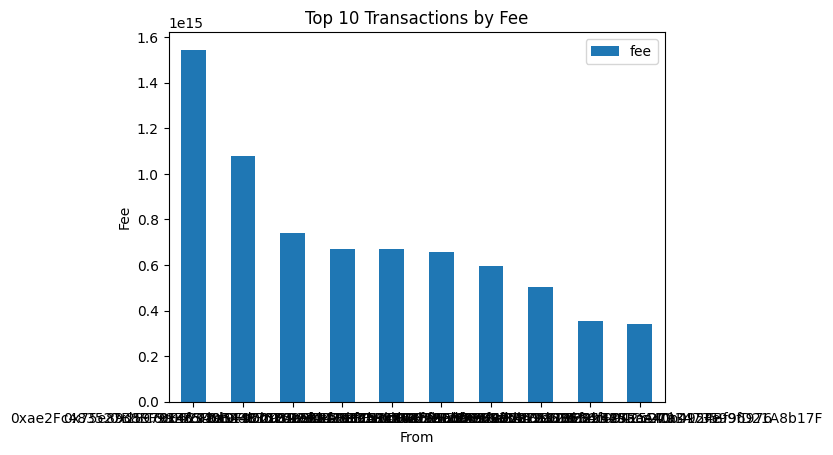

In [6]:
import matplotlib.pyplot as plt

# Chuyển đổi DataFrame Spark thành DataFrame Pandas
pandas_df = df_fee.limit(10).toPandas()

# Tạo biểu đồ cột
pandas_df.plot.bar(x='from', y='fee', rot=0)
plt.xlabel('From')
plt.ylabel('Fee')
plt.title('Top 10 Transactions by Fee')
plt.show()